In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Reading Data

In [22]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# Step 2: Exploring Data / Data Insight

In [23]:
print("Shape of the data:", data.shape)
print("Missing values:\n", data.isnull().sum())
print("Summary statistics:\n", data.describe())

Shape of the data: (1599, 12)
Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Summary statistics:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000 

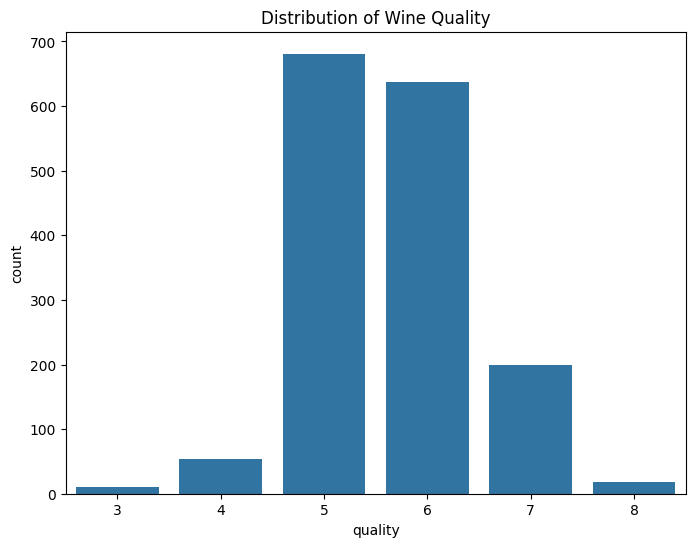

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality')
plt.show()

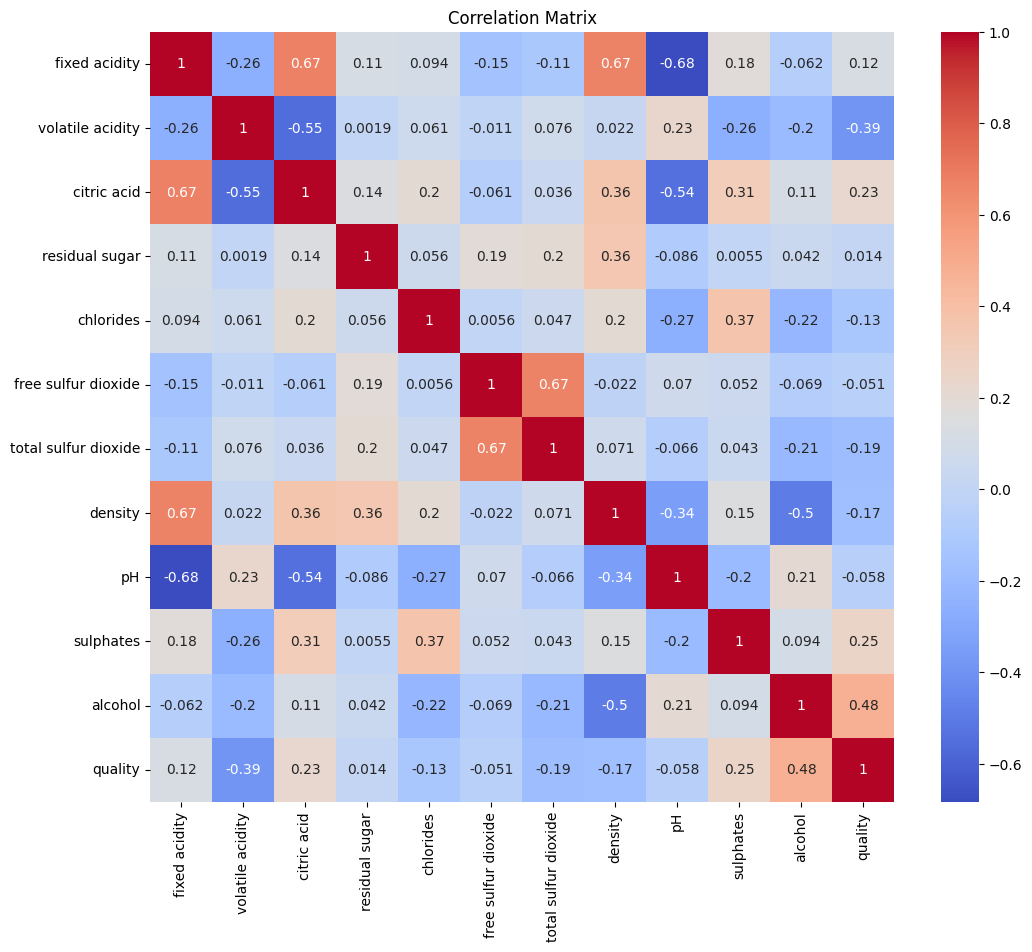

In [25]:
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 3: Cleansing Data

In [26]:
duplicates = data.duplicated()
print("Number of duplicate rows:", duplicates.sum())
if duplicates.sum() > 0:
    data = data.drop_duplicates()
    print("Duplicates removed. New shape:", data.shape)

Number of duplicate rows: 240
Duplicates removed. New shape: (1359, 12)


# Step 4: Outlier Detection and Removing

In [27]:
feature_cols = [col for col in data.columns if col != 'quality']
outlier_masks = []
for col in feature_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (data[col] < lower_bound) | (data[col] > upper_bound)
    outlier_masks.append(mask)
outlier_rows = pd.concat(outlier_masks, axis=1).any(axis=1)
data = data[~outlier_rows]
data = data.reset_index(drop=True)
print("Shape after removing outliers:", data.shape)

Shape after removing outliers: (1019, 12)


# Step 5: Data Transformation (Normalize Data / Rescale Data)

In [28]:
X = data.drop('quality', axis=1)
y = data['quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Step 6: Categorical into Numerical

In [29]:
print("All features are numerical.")

All features are numerical.


# Step 7: Dimensionality Reduction (PCA)

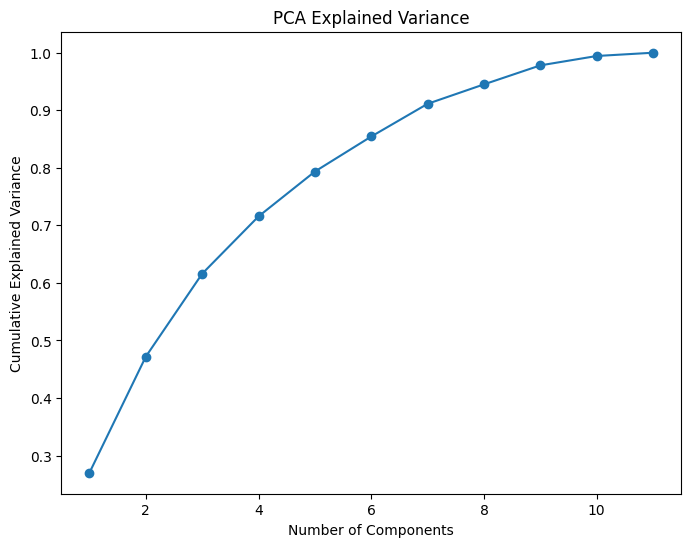

Number of components to retain 95% variance: 9


In [30]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()
cum_var = pca.explained_variance_ratio_.cumsum()
n_components = next(i for i, var in enumerate(cum_var) if var >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])